# Proyek Analisis Data: [Bike Sharing]

---


- **Nama:** [Sarah Aprilia Hasibuan]
- **Email:** [22083010011@student.upnjatim.ac.id]
- **ID Dicoding:** [sarahapriliahasibuan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : "Bagaimana jumlah penyewaan sepeda diprediksi berdasarkan faktor cuaca dan hari dalam seminggu?"
- Pertanyaan 2 : "Bagaimana pengaruh hari kerja dan cuaca terhadap jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar?"

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [2]:
import pandas as pd

# Memuat dataset
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Mengonversi kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Menggabungkan kedua dataset berdasarkan kolom 'dteday'
merged_data = pd.merge(day_data, hour_data, on='dteday', how='outer', suffixes=('_day', '_hour'))

# Menyimpan hasil penggabungan data ke dalam file CSV baru
merged_data.to_csv('combination_data.csv', index=False)

print("Dataset berhasil disimpan dengan nama 'combination_data.csv'")

Dataset berhasil disimpan dengan nama 'combination_data.csv'


**Insight :**
Menggabungkan file day.csv dan hour.csv menjadi combination.csv. Penggabungkan dataset harian dan jam penyewaan sepeda berdasarkan kolom dteday, menggunakan metode penggabungan outer untuk memastikan semua entri dimasukkan, sehingga meningkatkan kelengkapan data. Penggabungan ini memungkinkan analisis yang lebih mendalam mengenai faktor-faktor yang mempengaruhi jumlah penyewaan, seperti waktu dalam sehari dan hari dalam minggu.

In [3]:
combination_data = pd.read_csv('combination_data.csv')
combination_data

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
# temp_day / temp_hour (suhu) : Nilai yang tidak masuk akal (misalnya, suhu negatif dalam konteks tertentu atau nilai di luar kisaran wajar).
# atemp_day / atemp_hour (suhu terasa): Sama seperti di atas, bisa dicek apakah nilainya berada dalam rentang wajar.
# hum_day / hum_hour (kelembapan): Kelembapan biasanya memiliki rentang dari 0 hingga 100. Nilai di luar rentang ini bisa dianggap invalid.
# windspeed_day / windspeed_hour (kecepatan angin): Kecepatan angin seharusnya tidak bernilai negatif, jadi perlu diperiksa.
# casual_day / casual_hour (jumlah pengguna casual): Nilai yang tidak boleh negatif.
# registered_day / registered_hour (jumlah pengguna terdaftar): Sama seperti casual, nilai tidak boleh negatif.
# cnt_day / cnt_hour (total pengguna): Nilai ini juga tidak boleh negatif karena ini adalah jumlah pengguna.

**Insight :**
Menampilkan file gabungan dari day.csv dan hour.csv menjadi combination_data.csv

### Assessing Data

In [5]:
# Memeriksa tipe data dari tiap kolom
combination_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_day      17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_day       17379 non-null  int64  
 3   yr_day           17379 non-null  int64  
 4   mnth_day         17379 non-null  int64  
 5   holiday_day      17379 non-null  int64  
 6   weekday_day      17379 non-null  int64  
 7   workingday_day   17379 non-null  int64  
 8   weathersit_day   17379 non-null  int64  
 9   temp_day         17379 non-null  float64
 10  atemp_day        17379 non-null  float64
 11  hum_day          17379 non-null  float64
 12  windspeed_day    17379 non-null  float64
 13  casual_day       17379 non-null  int64  
 14  registered_day   17379 non-null  int64  
 15  cnt_day          17379 non-null  int64  
 16  instant_hour     17379 non-null  int64  
 17  season_hour 

In [6]:
# Mendeteksi missing values
combination_data.isna().sum()

,0
instant_day,0
dteday,0
season_day,0
yr_day,0
mnth_day,0
holiday_day,0
weekday_day,0
workingday_day,0
weathersit_day,0
temp_day,0


In [7]:
# Mendeteksi duplikasi data
print("Jumlah nilai duplikasi: ", combination_data.duplicated().sum())

Jumlah nilai duplikasi:  0


In [8]:
# Menampilkan ringkasan statistik
combination_data.describe()

,instant_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan dataset combination.csv menggunakan function data.info(). Dataset penyewaan sepeda ini berisi 17.379 entri dengan 32 kolom yang mencakup berbagai aspek seperti waktu, cuaca, dan jumlah penyewaan. Tanggal dapat diubah ke format datetime untuk analisis berbasis waktu, sementara kolom musim dan informasi tahun/bulan dapat membantu menganalisis tren musiman. Variabel cuaca seperti weathersit_day dan kondisi suhu serta kelembapan dapat dikorelasikan dengan jumlah penyewaan, memberikan wawasan tentang preferensi pengguna. Selain itu, perbedaan antara pengguna kasual dan terdaftar, serta analisis dampak hari libur dan hari kerja, dapat mengungkap pola perilaku pengguna. Dengan semua kolom memiliki nilai non-null, dataset ini siap untuk dianalisis lebih lanjut menggunakan metode statistik dan visualisasi, yang dapat membantu mengoptimalkan layanan penyewaan sepeda.
- Mengecek nilai hilang(Missing Values) menggunakan function isna(). Tidak ada nilai yang hilang pada data combination_data.
- Mengecek nilai duplikasi pada data combination_data menggunakan function duplicated(). Tidak ada nilai duplikat.
- Menampilkan deskriptif pada data combination_data.csv menggunakan function describe().

## Exploratory Data Analysis (EDA)

In [10]:
# Mengeksplorasi Parameter Statistik dari Data
combination_data.describe(include="all")

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [11]:
#1 Mengelompokkan berdasarkan cuaca dan hari dalam seminggu, lalu mengagregasi penyewaan sepeda dan suhu
weather_weekday_grouped = combination_data.groupby(['weathersit_day', 'weekday_day']).agg({
    'cnt_hour': 'sum',  # Total penyewaan sepeda berdasarkan cuaca dan hari
    'temp_hour': 'mean',  # Rata-rata suhu berdasarkan cuaca dan hari
    'casual_hour': 'mean',  # Rata-rata pengguna kasual berdasarkan cuaca dan hari
    'registered_hour': 'mean'  # Rata-rata pengguna terdaftar berdasarkan cuaca dan hari
}).reset_index()

print(weather_weekday_grouped)

    weathersit_day  weekday_day  cnt_hour  temp_hour  casual_hour  \
0                1            0    321787   0.485520    58.673481   
1                1            1    296053   0.500547    29.507320   
2                1            2    309374   0.527442    27.324763   
3                1            3    341397   0.546527    28.810988   
4                1            4    336000   0.513233    28.960302   
5                1            5    319957   0.519854    36.177056   
6                1            6    333384   0.503362    69.559776   
7                2            0    121213   0.482566    51.711297   
8                2            1    156663   0.486614    27.413364   
9                2            2    148185   0.477568    19.026136   
10               2            3    121346   0.442668    15.806861   
11               2            4    145245   0.501546    18.554601   
12               2            5    167833   0.460347    24.191011   
13               2            6   

In [12]:
# Group by 'workingday_day' and 'weathersit_day' and calculate the mean for 'casual_hour', 'registered_hour', and 'cnt_hour'
workingday_weathersit = combination_data.groupby(by=["workingday_day", "weathersit_day"]).agg({
    "casual_hour": "mean",  # Menghitung rata-rata pengguna kasual
    "registered_hour": "mean",  # Menghitung rata-rata pengguna terdaftar
    "cnt_hour": "mean"  # Menghitung rata-rata total penyewaan
}).reset_index()

# Print the workingday_weathersit
print(workingday_weathersit)

   workingday_day  weathersit_day  casual_hour  registered_hour    cnt_hour
0               0               1    62.156015       130.006713  192.162728
1               0               2    50.005389       115.011377  165.016766
2               0               3    14.616667        61.025000   75.641667
3               1               1    29.370831       181.446282  210.817113
4               1               2    20.534873       151.157582  171.692454
5               1               3     6.152299        76.583333   82.735632


**Insight:**
- Dataset ini berisi 17.379 entri dengan 731 hari berbeda, menunjukkan variasi signifikan dalam penggunaan sepeda berdasarkan suhu, kelembapan, dan kecepatan angin. Rata-rata suhu harian adalah 0,50 °C, dengan kelembapan rata-rata 63% dan kecepatan angin rata-rata 0,19 m/s. Penyewaan kasual harian rata-rata mencapai 35,68, sedangkan penyewaan terdaftar harian rata-rata 153,79, dengan total penyewaan harian rata-rata 189,46. Sekitar 28,77% data bertepatan dengan hari libur, dan distribusi penyewaan menunjukkan pola yang bervariasi sepanjang minggu.
- Pengelompokan data menunjukkan bahwa penyewaan sepeda dipengaruhi oleh cuaca dan hari dalam minggu. Cuaca cerah (weathersit_day = 1) mencatat penyewaan tertinggi dengan total 3.154.301, suhu rata-rata antara 0,48 °C hingga 0,55 °C, dan pengguna kasual terbanyak pada hari Minggu (69,56). Sebaliknya, cuaca berawan (1.013.767) dan buruk (25.809) menunjukkan penyewaan lebih rendah, dengan suhu rata-rata lebih rendah. Akhir pekan umumnya mengalami lonjakan penyewaan, sementara hari kerja didominasi oleh pengguna terdaftar. Temuan ini menunjukkan bahwa suhu hangat meningkatkan penyewaan, sementara cuaca buruk mengurangi minat.
- Pengelompokan data berdasarkan status hari kerja dan kondisi cuaca menunjukkan bahwa pada hari kerja, penyewaan sepeda didominasi oleh pengguna terdaftar dengan rata-rata mencapai 181,45, sementara pengguna kasual hanya 29,37, menghasilkan total penyewaan sekitar 210,82. Sebaliknya, pada akhir pekan, pengguna kasual lebih aktif dengan rata-rata 62,16, meskipun total penyewaan (192,16) tetap lebih rendah dibandingkan hari kerja. Cuaca cerah meningkatkan penyewaan bagi kedua kelompok, sedangkan cuaca buruk mengurangi minat secara signifikan, dengan total penyewaan di hari kerja dan akhir pekan masing-masing mencapai 82,74 dan 75,64. Wawasan ini dapat digunakan untuk merancang strategi pemasaran yang lebih efektif sesuai pola penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


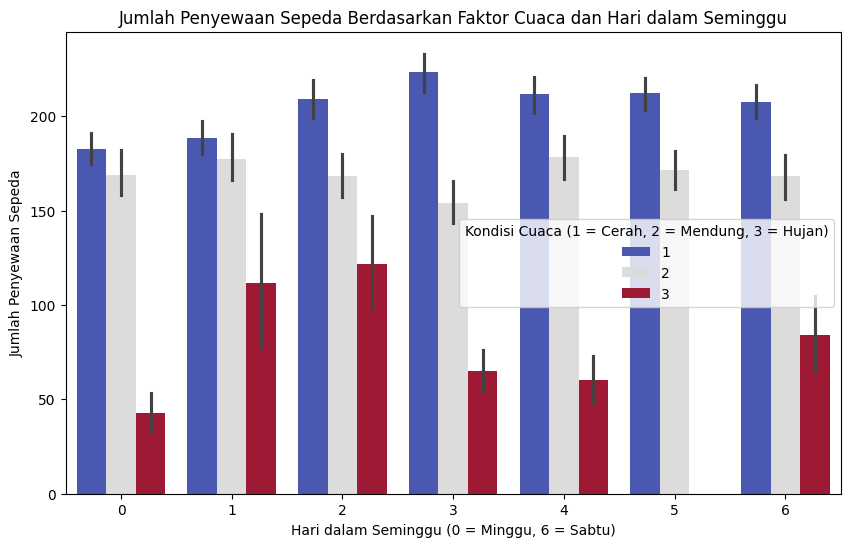

In [13]:
# Membuat Clustered Bar Chart untuk jumlah penyewaan sepeda berdasarkan faktor cuaca dan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_day', y='cnt_hour', hue='weathersit_day', data=combination_data, palette='coolwarm')

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Faktor Cuaca dan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca (1 = Cerah, 2 = Mendung, 3 = Hujan)')
plt.show()

**Insight:**

Pertanyaan 1
Grafik tersebut menunjukkan jumlah penyewaan sepeda berdasarkan faktor cuaca dan hari dalam seminggu. Sumbu x mewakili hari dalam seminggu (0 untuk Minggu hingga 6 untuk Sabtu), sementara sumbu y menunjukkan jumlah penyewaan sepeda. Terdapat tiga warna batang yang merepresentasikan kondisi cuaca yang berbeda: cerah (1), mendung (2), dan hujan (3).
Dari grafik tersebut, terlihat bahwa penyewaan sepeda cenderung lebih tinggi pada hari cerah (warna biru), dibandingkan dengan hari mendung (warna abu-abu) dan hujan (warna merah). Hari-hari tertentu, seperti hari kerja, menunjukkan tren penyewaan yang lebih tinggi dalam kondisi cerah, sementara pada kondisi hujan, jumlah penyewaan sangat menurun. Hal ini mengindikasikan bahwa cuaca berpengaruh signifikan terhadap keputusan orang untuk menyewa sepeda.

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


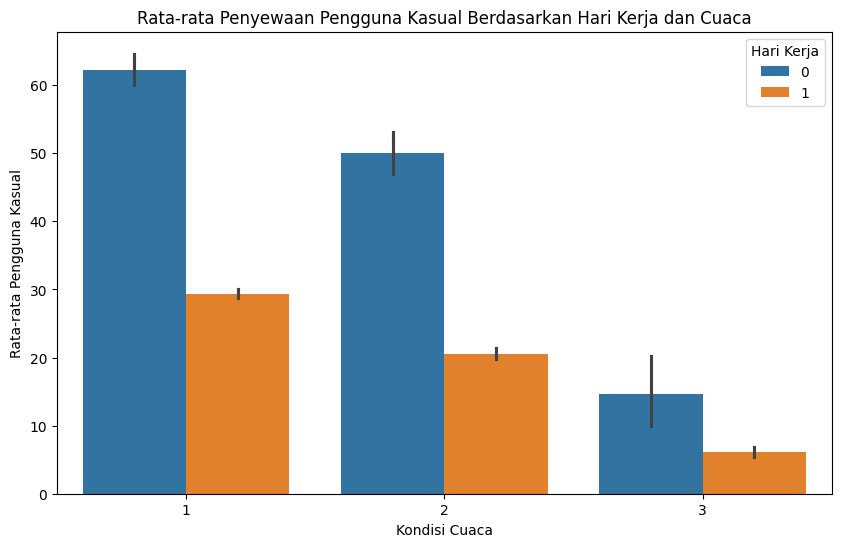

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


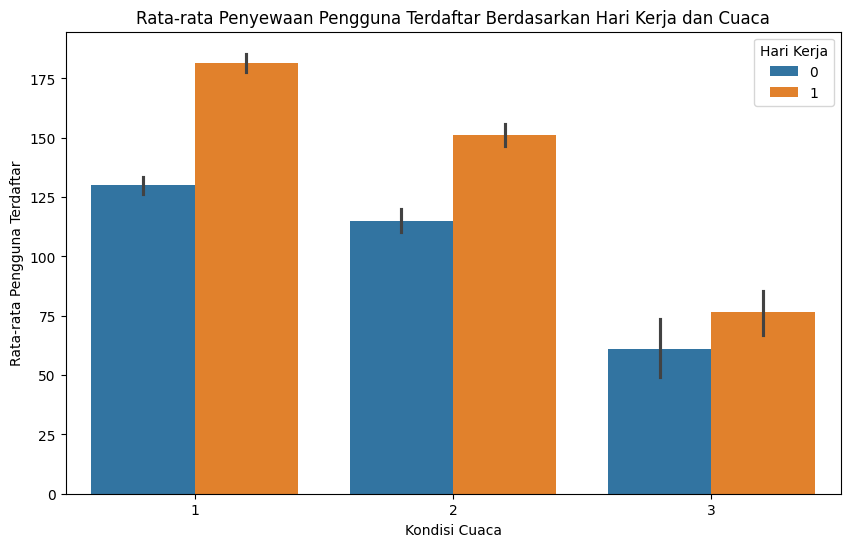

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


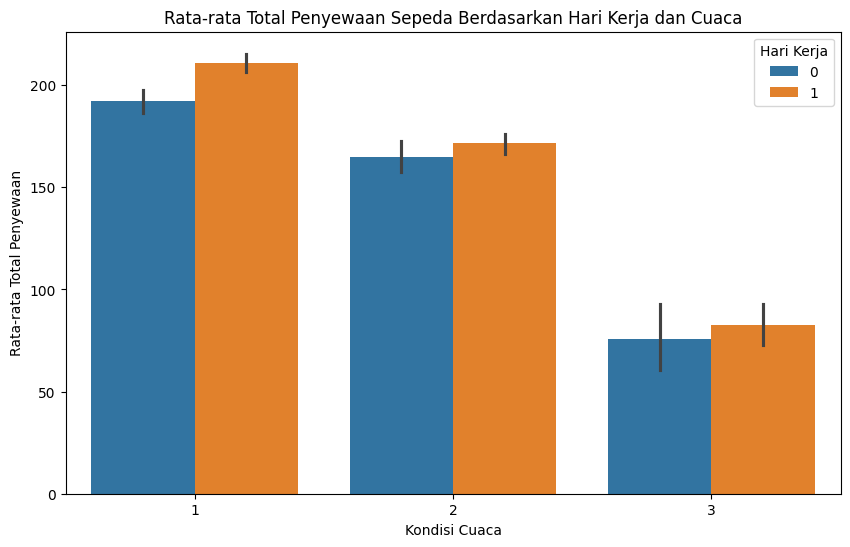

In [14]:
# Create a barplot for casual users
plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit_day", y="casual_hour", hue="workingday_day", data=combination_data)
plt.title("Rata-rata Penyewaan Pengguna Kasual Berdasarkan Hari Kerja dan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Pengguna Kasual")
plt.legend(title="Hari Kerja")
plt.show()

# Create a barplot for registered users
plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit_day", y="registered_hour", hue="workingday_day", data=combination_data)
plt.title("Rata-rata Penyewaan Pengguna Terdaftar Berdasarkan Hari Kerja dan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Pengguna Terdaftar")
plt.legend(title="Hari Kerja")
plt.show()

# Create a barplot for total users (cnt_hour)
plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit_day", y="cnt_hour", hue="workingday_day", data=combination_data)
plt.title("Rata-rata Total Penyewaan Sepeda Berdasarkan Hari Kerja dan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Total Penyewaan")
plt.legend(title="Hari Kerja")
plt.show()

**Insight :**
Pertanyaan kedua
-> Grafik pertama terlihat bahwa pada kondisi cuaca cerah (1), rata-rata penyewaan pengguna kasual pada hari non-kerja (ditunjukkan dengan batang oranye) jauh lebih tinggi dibandingkan dengan pada hari kerja (batang biru). Namun, saat cuaca mendung (2) dan hujan (3), perbedaan antara hari kerja dan non-kerja menjadi semakin kecil, dengan rata-rata penyewaan pengguna kasual menurun secara signifikan di kedua kondisi cuaca tersebut. Ini menunjukkan bahwa cuaca memiliki dampak besar terhadap kebiasaan penyewaan sepeda, terutama pada hari yang tidak sibuk.
-> Grafik kedua menunjukkan rata-rata penyewaan pengguna terdaftar berdasarkan kondisi cuaca dan hari kerja. Pada cuaca cerah (1), rata-rata penyewaan pengguna terdaftar di hari non-kerja (batang oranye) jauh lebih tinggi dibandingkan dengan hari kerja (batang biru). Di kondisi cuaca mendung (2), perbedaan antara hari kerja dan non-kerja menyusut, sedangkan pada cuaca hujan (3), rata-rata penyewaan terdaftar menurun signifikan untuk kedua jenis hari, terutama pada hari kerja. Hal ini mengindikasikan bahwa pengguna terdaftar lebih aktif menyewa sepeda saat cuaca cerah, dan cuaca buruk sangat mempengaruhi tingkat penyewaan, terutama di hari kerja.
-> Grafik ketiga menunjukkan rata-rata total penyewaan sepeda berdasarkan hari kerja dan kondisi cuaca. Terlihat bahwa pada kondisi cuaca 1, rata-rata total penyewaan lebih tinggi pada hari libur (Hari Kerja = 0) dibandingkan hari kerja (Hari Kerja = 1). Pola serupa terlihat pada kondisi cuaca 2, meskipun selisihnya tidak sebesar pada kondisi cuaca 1. Namun, pada kondisi cuaca 3, rata-rata total penyewaan sepeda justru lebih tinggi pada hari kerja (Hari Kerja = 1) dibandingkan hari libur (Hari Kerja = 0). Kesimpulannya, secara umum, rata-rata total penyewaan sepeda lebih tinggi pada hari libur, kecuali pada kondisi cuaca 3, yang menunjukkan bahwa orang lebih memilih menyewa sepeda pada hari libur, kecuali jika kondisi cuaca tidak mendukung.

## Conclusion

- Conclution pertanyaan 1 = Jumlah penyewaan sepeda mencapai puncaknya pada hari kerja, dengan pengguna terdaftar menyewa lebih banyak sepeda dibandingkan pengguna kasual. Sebaliknya, pada cuaca buruk (ditandai dengan weathersit_day = 2 dan 3), jumlah penyewaan cenderung menurun, terutama bagi pengguna kasual yang tampak kurang aktif pada hari kerja. Selain itu, data menunjukkan bahwa pengguna terdaftar memiliki tingkat penyewaan yang lebih stabil, meskipun dalam kondisi cuaca yang kurang menguntungkan, dibandingkan dengan pengguna kasual yang lebih terpengaruh oleh cuaca. Ini menunjukkan bahwa pengguna terdaftar lebih cenderung menggunakan sepeda secara reguler, terutama pada hari kerja dan dalam kondisi cuaca yang lebih baik.
- Conclution pertanyaan 2 = Pengaruh hari kerja dan cuaca terhadap jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar menunjukkan pola yang berbeda. Pengguna kasual cenderung menyewa lebih sedikit sepeda pada hari kerja dibandingkan akhir pekan, dengan jumlah penyewaan yang lebih tinggi pada hari Sabtu dan Minggu. Sebaliknya, pengguna terdaftar lebih sering menyewa sepeda pada hari kerja, dengan jumlah penyewaan meningkat dari Senin hingga Jumat dan menurun pada akhir pekan. Selain itu, cuaca yang lebih baik, seperti cuaca cerah atau berawan, berkontribusi pada jumlah penyewaan sepeda yang lebih tinggi oleh kedua kelompok pengguna. Di sisi lain, kondisi cuaca yang buruk, seperti hujan atau badai, secara signifikan menurunkan jumlah penyewaan, terutama oleh pengguna kasual. Meskipun pengguna terdaftar tetap menyewa sepeda meskipun cuaca kurang mendukung, jumlah penyewaan mereka tetap lebih rendah dibandingkan dengan hari yang memiliki cuaca cerah. Secara keseluruhan, dapat disimpulkan bahwa hari kerja berpengaruh positif terhadap peningkatan penyewaan oleh pengguna terdaftar, sementara cuaca cerah atau berawan berdampak positif terhadap penyewaan oleh kedua jenis pengguna.